# analysis

> Looking at outliers in terms of num_strokes, num_points.

In [ ]:
#| default_exp analysis

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import os

import numpy as np

from singleline_dataset.dataset import *
from singleline_dataset.display import *
from singleline_dataset.strokes import *
from singleline_dataset.svg import *
from singleline_dataset.transforms import *

## Full Runs

### Dataset V1

- `epsilon=1.0`
- No max stroke threshold

In [ ]:
## first dataset

# full_dataset = svgs_to_deltas('../../svg-dataset/sketch_mgmt/imgs_sorted/drawings_svg_cropped/', '../outputs', limit=None)
# np.savez('../datasets/v1-splice.npz', full_dataset, encoding='latin1', allow_pickle=True)

## Dataset V2

- `epsilon=0.5`
- `max_stroke={5,6}`

In [ ]:
# ## second dataset

# %%time

# full_dataset_eps05 = svgs_to_deltas(
#     "../../svg-dataset/sketch_mgmt/imgs_sorted/drawings_svg_cropped/",
#     "../outputs_segmented",
#     epsilon=0.5,
#     limit=None,
# )

# print("-" * 50)
# print(len(full_dataset_eps05))
# print("-" * 50)
# np.savez(
#     "../datasets/v2-splice-eps05-j15-s40.npz",
#     full_dataset_eps05,
#     encoding="latin1",
#     allow_pickle=True,
# )

Analysis: choosing max stroke threshold, to filter out drawings with too much complexity.

In [ ]:
# full_dataset = np.load(
#     "../datasets/v2-splice-eps05-j15-s40.npz", encoding="latin1", allow_pickle=True
# )["arr_0"]
# len(full_dataset)

# df = stroke_summary_df(full_dataset)
# df.head()

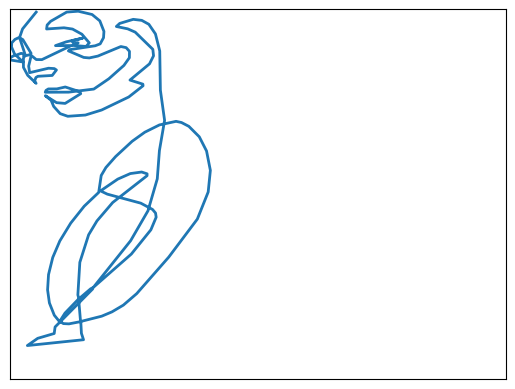

In [ ]:
plot_strokes(deltas_to_strokes(full_dataset[0]))

<Axes: >

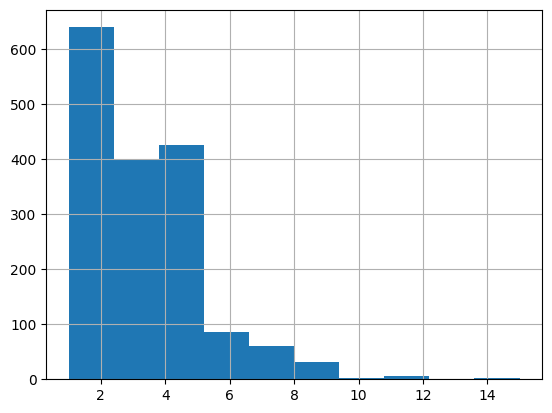

In [ ]:
df.num_strokes.hist()

In [ ]:
for i in range(10):
    print(i, len(df[df.num_strokes <= i]))

0 0
1 196
2 639
3 1037
4 1333
5 1462
6 1547
7 1607
8 1628
9 1639


## Chop Dataset into Train/Val

In [ ]:
d6 = df[df.num_strokes <= 6].sample(frac=1)
train_size = int(len(d6) * 0.8 / 100) * 100
val_size = len(d6) - train_size
print(train_size, val_size, len(d6))

d6_train = full_dataset[list(d6[:train_size].idx)]
d6_val = full_dataset[list(d6[train_size:].idx)]
print(len(d6_train), len(d6_val))

np.savez(
    "v2-splice-maxstrokes6.npz",
    train=d6_train,
    valid=d6_val,
    test=d6_val,
    encoding="latin1",
    allow_pickle=True,
)

1200 347 1547
1200 347


(1200, 347)

<Axes: >

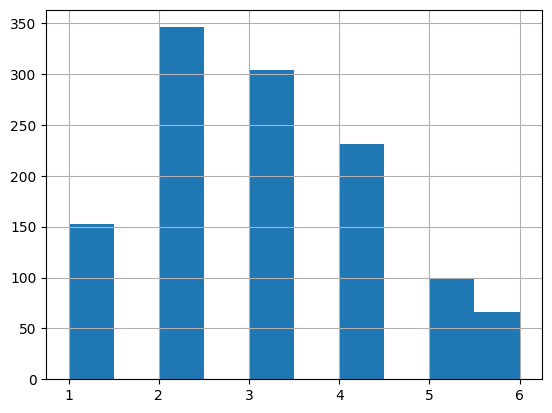

In [ ]:
d6_summary = [
    {"idx": i, "num_points": len(deltas), "num_strokes": len(deltas_to_strokes(deltas))}
    for i, deltas in enumerate(d6_train)
]
d6df = pd.DataFrame(d6_summary)
d6df.num_strokes.hist()

In [ ]:
d5 = df[df.num_strokes <= 5].sample(frac=1)
train_size = int(len(d5) * 0.8 / 100) * 100
val_size = len(d5) - train_size
print(train_size, val_size, len(d5))

d5_train = full_dataset[list(d5[:1200].idx)]
d5_val = full_dataset[list(d5[1200:].idx)]
print(len(d5_train), len(d5_val))

np.savez(
    "v2-splice-maxstrokes5.npz",
    train=d5_train,
    valid=d5_val,
    test=d5_val,
    encoding="latin1",
    allow_pickle=True,
)

1100 362 1462
1200 262


## Inspect edge cases

<Axes: >

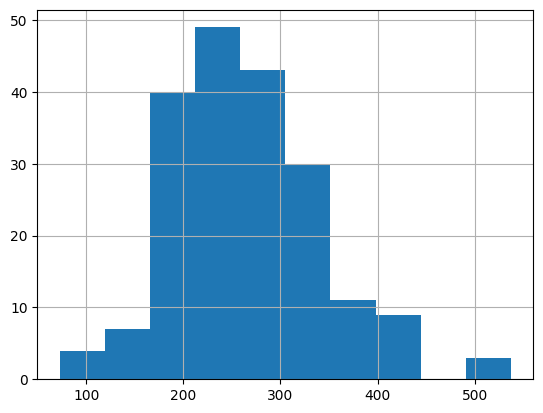

In [ ]:
df[df.num_strokes <= 2].num_points.hist()

In [ ]:
df[df.num_strokes <= 2].iloc[:5]

,idx,num_points,num_strokes
1455,0,177,2
1456,5,252,2
1457,12,236,2
1458,28,387,2
1459,35,303,2


In [ ]:
df[df.num_strokes <= 2].iloc[:5]

idx              0
num_points     177
num_strokes      2
Name: 1455, dtype: int64


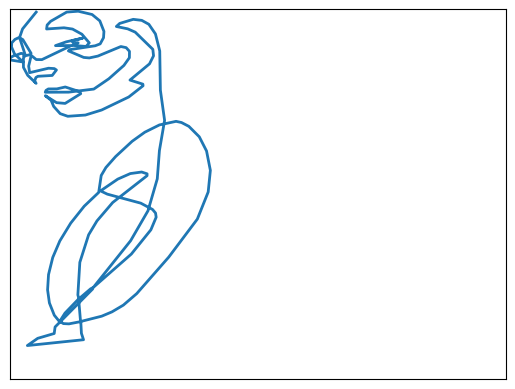

idx              5
num_points     252
num_strokes      2
Name: 1456, dtype: int64


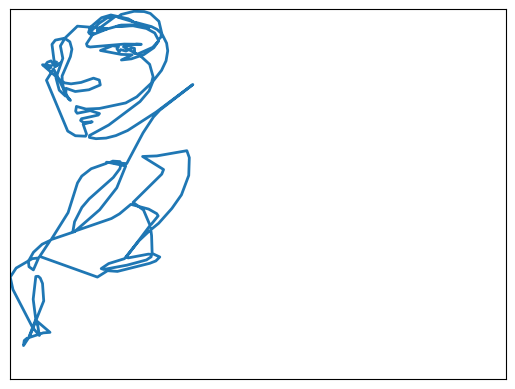

idx             12
num_points     236
num_strokes      2
Name: 1457, dtype: int64


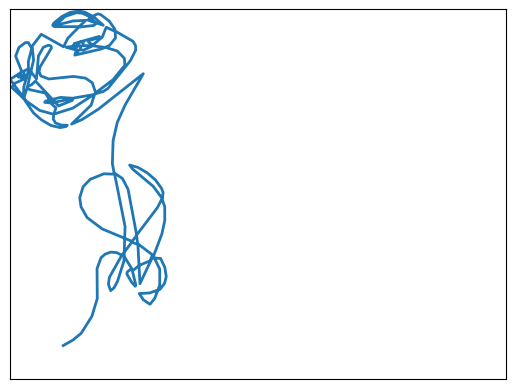

idx             28
num_points     387
num_strokes      2
Name: 1458, dtype: int64


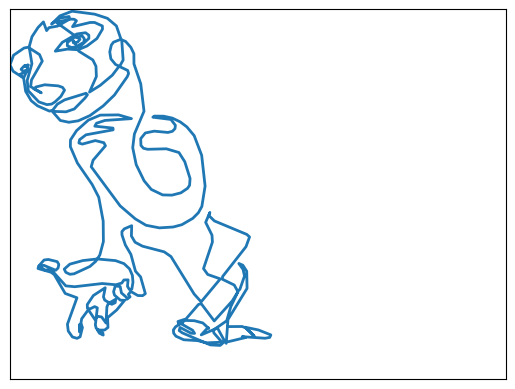

idx             35
num_points     303
num_strokes      2
Name: 1459, dtype: int64


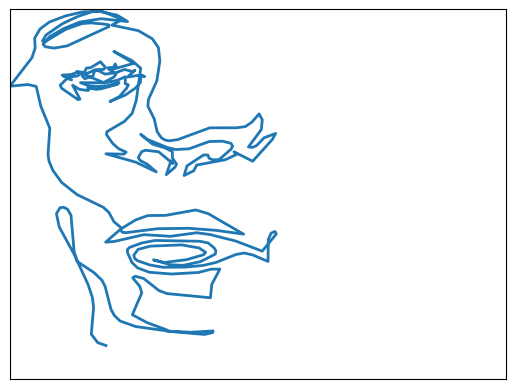

In [ ]:
for i in range(5):
    row = df[df.num_strokes <= 2].iloc[i]
    print(row)
    plot_strokes(deltas_to_strokes(full_dataset[row.idx]))

In [ ]:
tmp = full_dataset[row.idx]

In [ ]:
tmp1 = deltas_to_strokes(tmp)

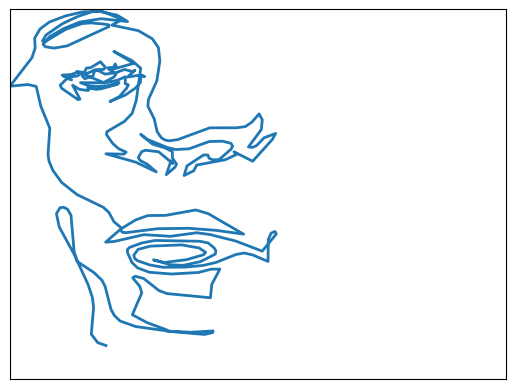

In [ ]:
plot_strokes(tmp1)

In [ ]:
tmp1 = [s for s in deltas_to_strokes(tmp) if len(s) > 0]

strokes_to_deltas(rdp_strokes(tmp1, epsilon=1.1)).shape

(194, 3)

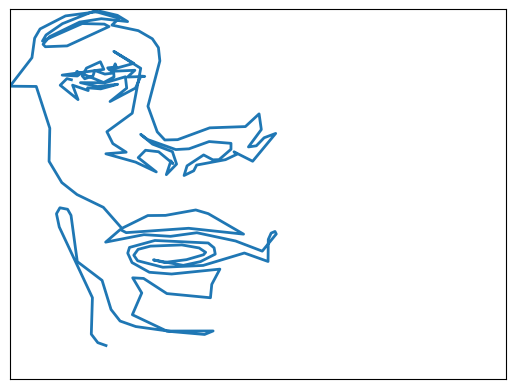

In [ ]:
plot_strokes(rdp_strokes(tmp1, epsilon=1.1))

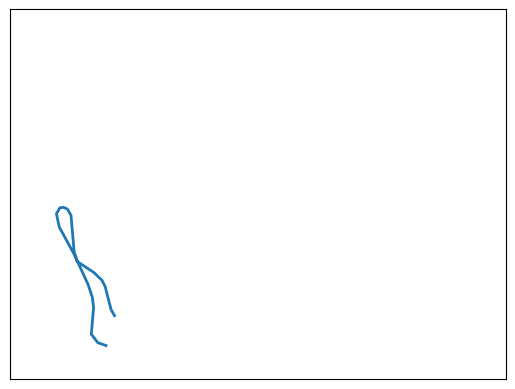

In [ ]:
import numpy as np

max_seq_len = 20
overflow = len(tmp) - max_seq_len
rand_offset = int(np.random.rand() * overflow)
overflow, rand_offset
rand_offset = 0
plot_strokes(deltas_to_strokes(tmp[rand_offset : rand_offset + max_seq_len]))

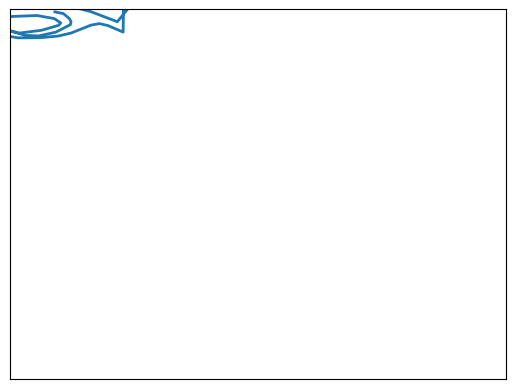

In [ ]:
plot

<Axes: >

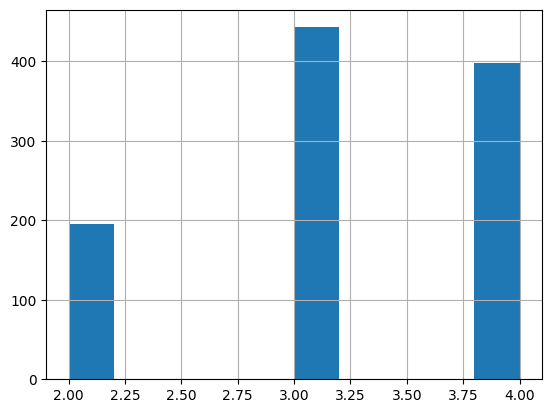

In [ ]:
df[df.num_strokes < 5].sample(frac=1).num_strokes.hist()

In [ ]:
len(df[df.num_strokes == 6])

129

In [ ]:
# for i in range(5):
#     row = df[df.num_strokes == 6].iloc[i]
#     print(row)
#     plot_strokes(deltas_to_strokes(full_dataset[row.idx]))

In [ ]:
# for entry in by_num_strokes[10:20]:
#     idx, num_points, num_strokes = entry
#     plot_strokes(deltas_to_strokes(full_dataset[idx]))

## Find shortest strokes

In [ ]:
len(df[df.num_strokes == 4])

310

In [ ]:
# for idx in range(len(df[df.num_strokes <= 4])):
#     print(idx)

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()